# Data Cleaning

In [39]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [40]:
#load the flights dataset randomly selected
flights_raw = pd.read_csv('data/flightsD.csv')
flights_raw.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'rn', 'fl_date.1'],
      dtype='object')

In [41]:
#shape of flights
flights_raw.shape

(240000, 45)

In [42]:
#counting null values
flights_raw.isnull().sum()

Unnamed: 0                  0
fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                    0
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
dep_delay                  84
taxi_out                  104
wheels_off                104
wheels_on                 104
taxi_in                   104
crs_arr_time                0
arr_time                    0
arr_delay                   0
cancelled                   0
cancellation_code      240000
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                  104
flights                     0
distance  

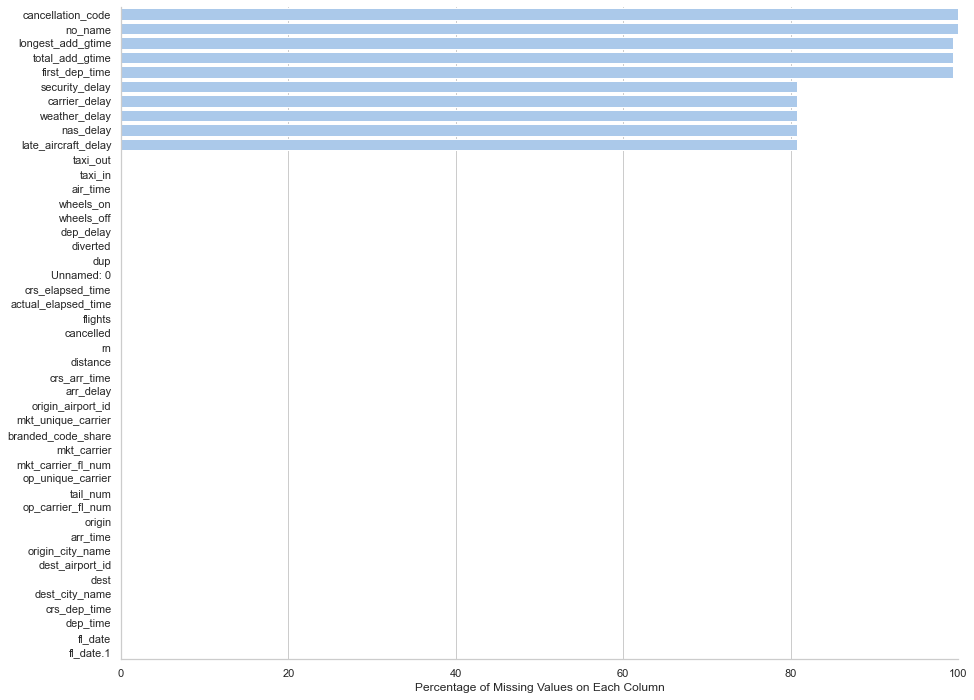

In [43]:
#plotting the percentage of missing values in each column
flights_raw_length = len(flights_raw)
flights_raw_null = (flights_raw.isnull().sum().sort_values(ascending=False)*100/len(flights_raw))
f, ax = plt.subplots(figsize=(15, 12))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Percentage of Missing Values on Each Column")
sns.barplot(x=flights_raw_null.values, y=flights_raw_null.index, color="b")
sns.despine()

In [48]:
#dropping null values with more than 80% nulls
flights_raw = flights_raw.drop(columns = ['no_name', 'longest_add_gtime','total_add_gtime'
                                          ,'first_dep_time','late_aircraft_delay','security_delay',
                                          'nas_delay','weather_delay','carrier_delay','cancellation_code','fl_date.1','Unnamed: 0'],axis=1)

In [44]:
#check none label classes
flights_raw[flights_raw['arr_delay']==0]

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,rn,fl_date.1
120,120,2018-01-02,WN,WN,WN,4836,WN,N203WN,4836,14307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121,2018-01-02
162,162,2018-01-05,AA,AA_CODESHARE,AA,4787,PT,N331EN,4787,11057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163,2018-01-05
191,191,2018-01-11,UA,UA_CODESHARE,UA,5280,OO,N929EV,5280,14262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192,2018-01-11
204,204,2018-01-25,AA,AA_CODESHARE,AA,3459,MQ,N693AE,3459,14814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,2018-01-25
209,209,2018-01-14,DL,DL_CODESHARE,DL,4954,OO,N923EV,4954,13377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239748,239748,2019-12-21,UA,UA_CODESHARE,UA,4354,EV,N615UX,4354,10397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9749,2019-12-21
239771,239771,2019-12-02,AA,AA,AA,1213,AA,N892NN,1213,13930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9772,2019-12-02
239786,239786,2019-12-25,WN,WN,WN,1317,WN,N775SW,1317,14635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9787,2019-12-25
239825,239825,2019-12-01,WN,WN,WN,1237,WN,N8567Z,1237,13232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9826,2019-12-01


In [49]:
#filling null values with mean
flights_raw['dep_delay'] = flights_raw['dep_delay'].fillna(flights_raw['dep_delay'].mean())
flights_raw['taxi_out'] = flights_raw['taxi_out'].fillna(flights_raw['taxi_out'].mean())
flights_raw['wheels_off'] = flights_raw['wheels_off'].fillna(flights_raw['wheels_off'].mean())
flights_raw['wheels_on'] = flights_raw['wheels_on'].fillna(flights_raw['wheels_on'].mean())
flights_raw['taxi_in'] = flights_raw['taxi_in'].fillna(flights_raw['taxi_in'].mean())
flights_raw['air_time'] = flights_raw['air_time'].fillna(flights_raw['air_time'].mean())

In [50]:
#flights_raw dropping null value for arr_delay
flights_raw = flights_raw [flights_raw ['arr_delay'].notna()]
flights_raw.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
rn                     0
dtype: int64

In [51]:
#Finding the Boundary Values for raw data
print("Highest allowed",flights_raw ['arr_delay'].mean() +3*flights_raw ['arr_delay'].std())
print("Lowest allowed",flights_raw ['arr_delay'].mean() - 3*flights_raw ['arr_delay'].std())


Highest allowed 153.82712452346735
Lowest allowed -142.93288285680066


In [62]:
# converting fl_date to date format and gert he month
flights_raw['fl_date'] = pd.to_datetime(flights_raw['fl_date'])
flights_raw['month'] = flights_raw['fl_date'].dt.month
flights_raw['year'] = flights_raw['fl_date'].dt.year
flights_raw['day'] = flights_raw['fl_date'].dt.day

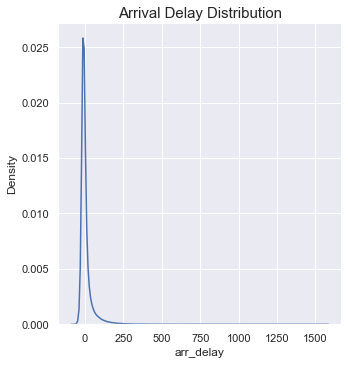

In [63]:
#arrival delay distribution
sns.set_theme(style="darkgrid")
sns.displot(flights_raw, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [66]:
#outlier treatment
def outlier_treatment(datacolumn):
       
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [70]:
lowerbound,upperbound = outlier_treatment(flights_raw.arr_delay)
lowerbound,upperbound 

(-49.5, 42.5)

In [72]:
#non outlier data
flights_raw_no_outlier_iqr=flights_raw[(flights_raw.arr_delay < lowerbound) | (flights_raw.arr_delay > upperbound)]

In [61]:
#Remvoving outliers for Arrival
from scipy.stats import IQR
Q1_arrival = flights_raw.arr_delay.quantile(0.25)
Q3_arrival = flights_raw.arr_delay.quantile(0.75)
IQR_arrival = Q3_arrival - Q1_arrival
flights_raw_no_outlier_iqr = flights_raw.loc[(flights_raw['arr_delay'] >= (Q1_arrival - 1.5*IQR))\
                                     & (flights_raw['arr_delay'] <= Q3_arrival + 1.5*IQR)]

ImportError: cannot import name 'IQR' from 'scipy.stats' (C:\Users\My account\anaconda3\lib\site-packages\scipy\stats\__init__.py)

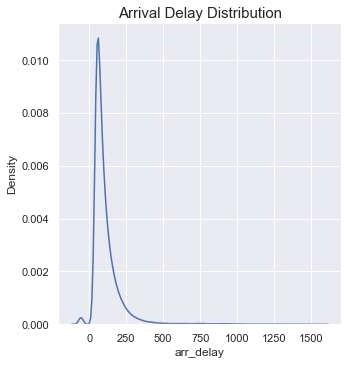

In [73]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_raw_no_outlier_iqr, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [74]:
#save the result into csv format
flights_raw_no_outlier_iqr.to_csv('data/flights_raw_no_outlier_iqr.csv')

In [75]:
#cleaned and without outlier
flights=flights_raw_no_outlier_iqr
type(flights.fl_date)

pandas.core.series.Series

In [76]:
#calculate the mean grouby month 
arr_del_mean_month = flights.groupby('month')['arr_delay'].mean()
arr_del_mean_month

month
1     113.292128
2     114.260059
3     108.459974
4     111.124639
5     112.534594
6     112.761269
7     112.304114
8     115.575680
9     108.257294
10    108.127796
11    112.010782
12    106.160129
Name: arr_delay, dtype: float64

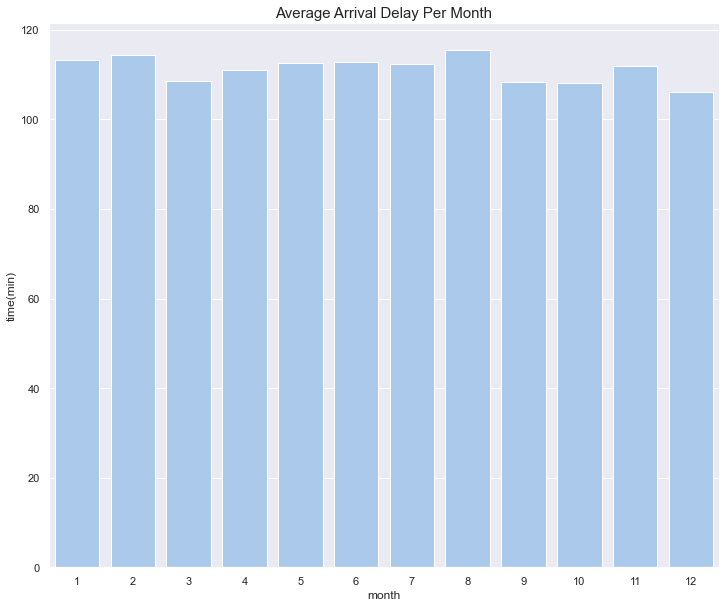

In [77]:
#mean of arrival dealy for each month
f, ax = plt.subplots(figsize=(12, 10))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 10), ylabel="time(min)")
sns.barplot(x=arr_del_mean_month.index, y=arr_del_mean_month.values, color="b")
plt.title("Average Arrival Delay Per Month", size=15)
sns.despine()

In [78]:
#save the cleaned data 
flights['fl_date'] = pd.to_datetime(flights['fl_date'])
#flights['month'] = flights['fl_date'].dt.month
flights['year'] = flights['fl_date'].dt.year
flights['day'] = flights['fl_date'].dt.day
flights.to_csv('data/flights_cleaned.csv')

C:\Users\MYACCO~1\AppData\Local\Temp/ipykernel_16872/2374598215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['fl_date'] = pd.to_datetime(flights['fl_date'])
C:\Users\MYACCO~1\AppData\Local\Temp/ipykernel_16872/2374598215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['year'] = flights['fl_date'].dt.year
C:\Users\MYACCO~1\AppData\Local\Temp/ipykernel_16872/2374598215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [79]:
#checking passanger dataframe
passengers_raw = pd.read_csv('data/passengers.csv')
passengers_raw.columns

Index(['Unnamed: 0', 'departures_scheduled', 'departures_performed', 'payload',
       'seats', 'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp',
       'air_time', 'unique_carrier', 'airline_id', 'unique_carrier_name',
       'region', 'carrier', 'carrier_name', 'carrier_group',
       'carrier_group_new', 'origin_airport_id', 'origin_city_market_id',
       'origin', 'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [181]:
#checking passenger data frame for null values
passengers_raw.isnull().sum()

Unnamed: 0               0
departures_scheduled     0
departures_performed     0
payload                  0
seats                    0
passengers               0
freight                  0
mail                     0
distance                 0
ramp_to_ramp             0
air_time                 0
unique_carrier           0
airline_id               0
unique_carrier_name      0
region                   0
carrier                  0
carrier_name             0
carrier_group            0
carrier_group_new        0
origin_airport_id        0
origin_city_market_id    0
origin                   0
origin_city_name         0
origin_country           0
origin_country_name      0
dest_airport_id          0
dest_city_market_id      0
dest                     0
dest_city_name           0
dest_country             0
dest_country_name        0
aircraft_group           0
aircraft_type            0
aircraft_config          0
year                     0
month                    0
distance_group           0
c

In [260]:
#save clean passenger data
passengers_raw.to_csv('data/passengers_cleaned.csv')